# Import necessary libraries

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report


# 1. Load and Merge Datasets

In [12]:
# Load datasets
cleaned_df = pd.read_csv('cleaned.csv')
rta_df = pd.read_csv('RTA Dataset.csv')

In [13]:
merged_df.head()

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians_x,Types_of_Junction_x,Road_surface_type_x,Light_conditions_x,Weather_conditions_x,...,Light_conditions_y,Weather_conditions_y,Type_of_collision_y,Number_of_vehicles_involved,Number_of_casualties,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Accident_severity_y
0,18-30,Male,Above high school,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,...,Daylight,Normal,Collision with roadside-parked vehicles,2,2,na,na,na,na,Slight Injury
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,...,Daylight,Normal,Vehicle with vehicle collision,2,2,na,na,na,na,Slight Injury
2,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,...,Daylight,Normal,Collision with roadside objects,2,1,Passenger,Female,31-50,3,Slight Injury
3,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,...,Daylight,Normal,Vehicle with vehicle collision,1,1,Driver or rider,Male,Under 18,3,Slight Injury
4,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,...,Daylight,Normal,Collision with roadside objects,2,2,Passenger,Female,Over 51,3,Slight Injury


In [14]:
merged_df.shape

(94310, 35)

In [15]:
merged_df.info(10)

<class 'pandas.core.frame.DataFrame'>
Index: 94310 entries, 0 to 105075
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age_band_of_driver           94310 non-null  object
 1   Sex_of_driver                94310 non-null  object
 2   Educational_level            94310 non-null  object
 3   Vehicle_driver_relation      94310 non-null  object
 4   Driving_experience           94310 non-null  object
 5   Lanes_or_Medians_x           94310 non-null  object
 6   Types_of_Junction_x          94310 non-null  object
 7   Road_surface_type_x          94310 non-null  object
 8   Light_conditions_x           94310 non-null  object
 9   Weather_conditions_x         94310 non-null  object
 10  Type_of_collision_x          94310 non-null  object
 11  Vehicle_movement             94310 non-null  object
 12  Pedestrian_movement          94310 non-null  object
 13  Cause_of_accident            94310 

In [16]:
merged_df.describe()

,Accident_severity_x,Number_of_vehicles_involved,Number_of_casualties
count,94310.000000,94310.000000,94310.000000
mean,1.830909,2.054045,1.555487
std,0.405987,0.693671,1.023239
min,0.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000
50%,2.000000,2.000000,1.000000
75%,2.000000,2.000000,2.000000
max,2.000000,7.000000,8.000000


In [17]:
# Merge datasets on common columns
merged_df = pd.merge(cleaned_df, rta_df, on=[
    'Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
    'Vehicle_driver_relation', 'Driving_experience',
    'Vehicle_movement', 'Pedestrian_movement', 'Cause_of_accident'
], how='inner')

# Drop duplicates
merged_df = merged_df.drop_duplicates()

# 2. Data Cleaning

In [18]:
# Drop columns with excessive missing values
merged_df = merged_df.drop(columns=[
    'Service_year_of_vehicle', 'Defect_of_vehicle',
    'Work_of_casuality', 'Fitness_of_casuality'
])

# Fill missing values in categorical columns using mode
for col in ['Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured',
            'Lanes_or_Medians_y', 'Road_allignment', 'Types_of_Junction_y',
            'Road_surface_type_y', 'Type_of_collision_y']:
    merged_df[col].fillna(merged_df[col].mode()[0], inplace=True)

# Drop any remaining rows with missing values
merged_df = merged_df.dropna()

<ipython-input-18-d0b0ef27694b>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df[col].fillna(merged_df[col].mode()[0], inplace=True)


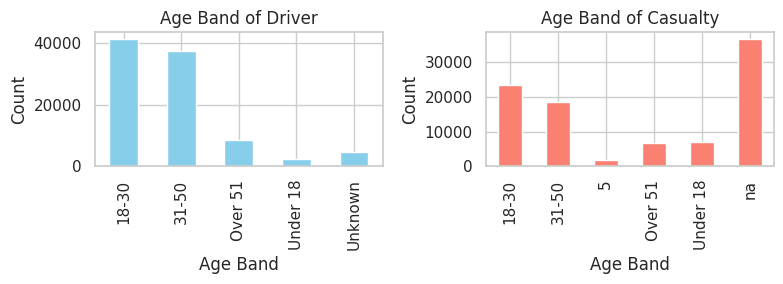

In [19]:
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
merged_df['Age_band_of_driver'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Age Band of Driver')
plt.xlabel('Age Band')
plt.ylabel('Count')

#Age_band_of_casualty

plt.subplot(1, 2, 2)
merged_df['Age_band_of_casualty'].value_counts().sort_index().plot(kind='bar', color='salmon')
plt.title('Age Band of Casualty')
plt.xlabel('Age Band')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

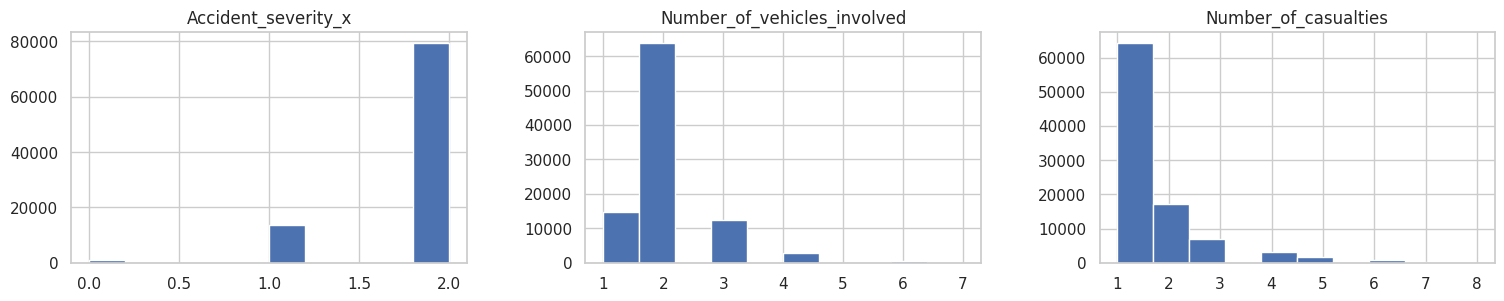

In [20]:
merged_df.hist(layout=(1,4), figsize=(25,3))
plt.show()

# 3. Exploratory Data Analysis (EDA)

<ipython-input-21-8d5447a16789>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='Accident_severity_y', palette='viridis')


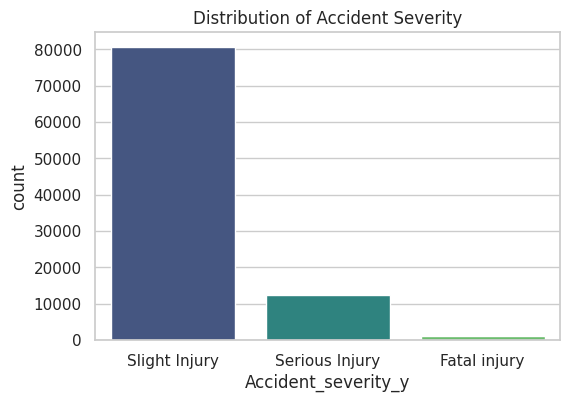

In [21]:
sns.set(style="whitegrid")

# Distribution of Accident Severity
plt.figure(figsize=(6, 4))
sns.countplot(data=merged_df, x='Accident_severity_y', palette='viridis')
plt.title('Distribution of Accident Severity')
plt.show()

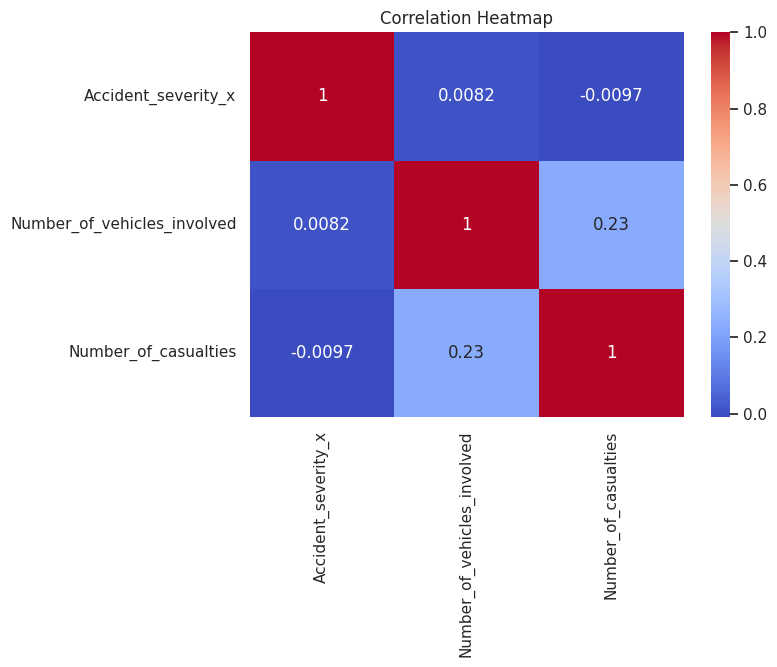

In [22]:
# Correlation heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(merged_df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

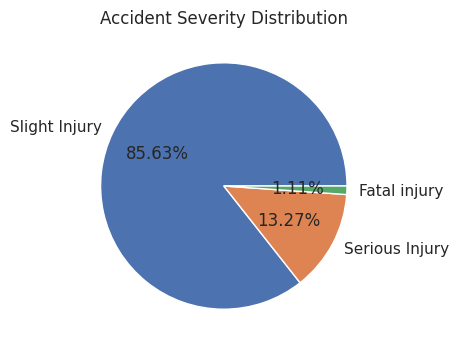

In [23]:
# Pie Chart for Accident Severity
plt.figure(figsize=(6, 4))
plt.pie(x=merged_df['Accident_severity_y'].value_counts().values,
        labels=merged_df['Accident_severity_y'].value_counts().index,
        autopct='%2.2f%%')
plt.title('Accident Severity Distribution')
plt.show()

# 4. Decision Tree Model - Accident Severity

In [24]:
# Encode categorical features
label_encoders = {}
df_encoded = merged_df.copy()

for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Define features and target
X = df_encoded.drop(columns=['Accident_severity_x', 'Accident_severity_y'])
y = df_encoded['Accident_severity_x']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions and performance metrics
y_pred = dt_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9142544092178277
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80       351
           1       0.72      0.75      0.73      4169
           2       0.95      0.94      0.95     23773

    accuracy                           0.91     28293
   macro avg       0.81      0.84      0.83     28293
weighted avg       0.92      0.91      0.92     28293



# 5. Decision Tree Model - Predicting Time

In [25]:
# Optional: Predict time of accidents (if applicable)
X = df_encoded.drop(columns=['Time'])
y = df_encoded['Time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42, max_depth=5, max_leaf_nodes=10)
clf.fit(X_train, y_train)

# Predictions and visualization
y_pred = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%')
print(classification_report(y_test, y_pred))

Accuracy: 2.10%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00        48
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00         9
          11       0.00      0.00      0.00        10
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00        13
          14       0.00      0.00      0.00         7
          15       0.00      0.00      0.00        10
          16       0.00      0.00      0.00        49
          17       0.00      0.00      0.00         5
          1

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


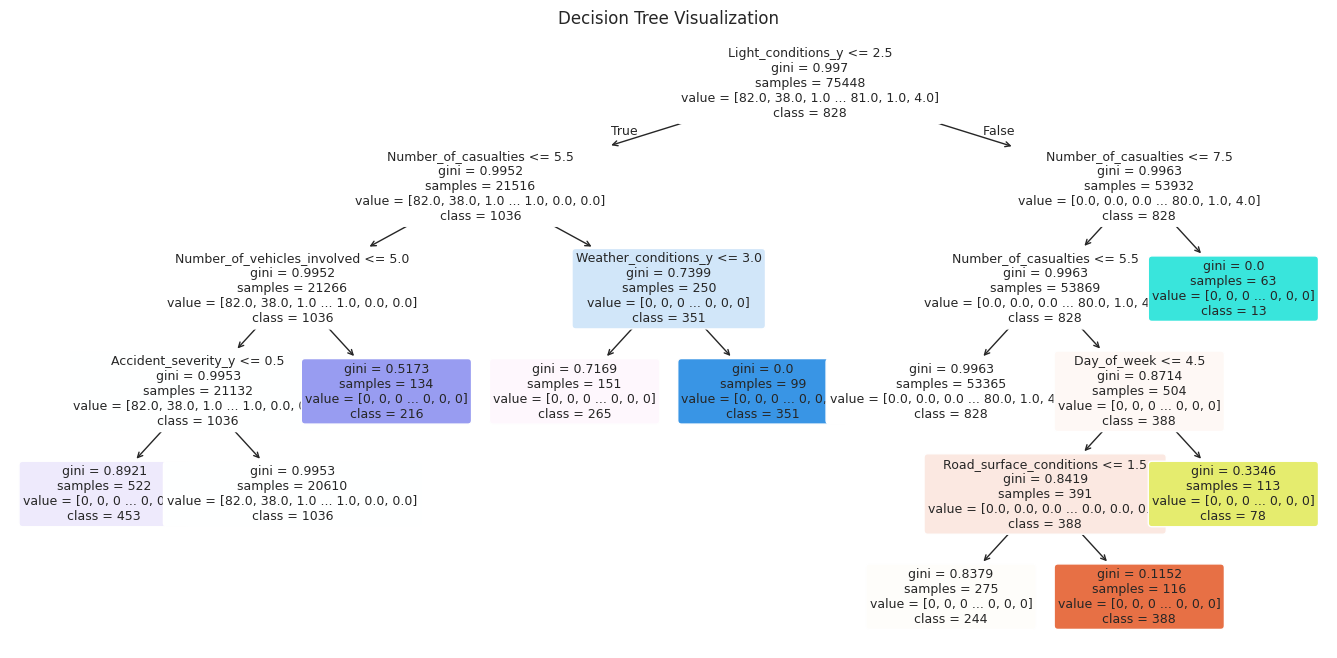

In [26]:
plt.figure(figsize=(17, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=y.unique().astype(str),
          rounded=True, fontsize=9, precision=4)
plt.title("Decision Tree Visualization")
plt.show()

# 6. Save Processed Dataset

In [27]:
df_encoded['Decision_Tree_Prediction'] = dt_model.predict(df_encoded.drop(columns=['Accident_severity_x', 'Accident_severity_y']))
df_encoded.to_csv('road_traffic_accidents_analysis.csv', index=False)

# 7. Visualization: Precision and Recall

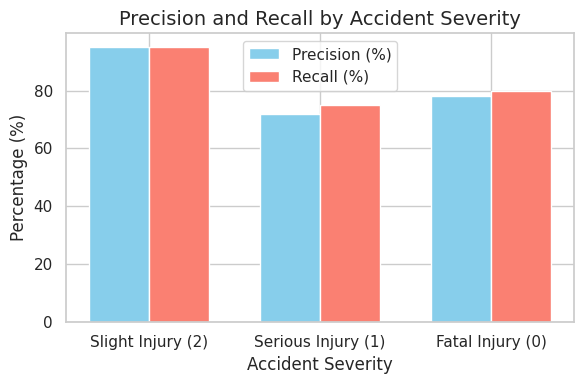

In [28]:
# Data for the chart
categories = ['Slight Injury (2)', 'Serious Injury (1)', 'Fatal Injury (0)']
precision = [95, 72, 78]
recall = [95, 75, 80]

plt.figure(figsize=(6, 4))
bar_width = 0.35
index = range(len(categories))

# Bar chart
plt.bar(index, precision, bar_width, label='Precision (%)', color='skyblue')
plt.bar([i + bar_width for i in index], recall, bar_width, label='Recall (%)', color='salmon')
plt.xlabel('Accident Severity', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.title('Precision and Recall by Accident Severity', fontsize=14)
plt.xticks([i + bar_width / 2 for i in index], categories)
plt.legend()
plt.tight_layout()
plt.show()

# 8. Visualization: Accidents by Hour

<ipython-input-29-b9e01c758c84>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour


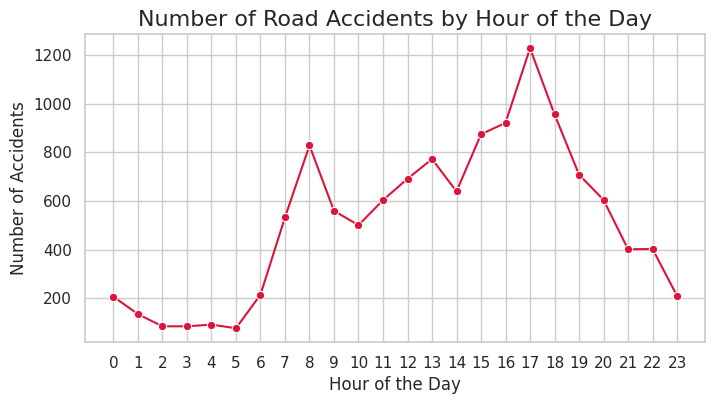

In [29]:
df = pd.read_csv('/content/RTA Dataset.csv')  # Replace with your dataset path
df['Time'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour

# Count accidents by hour
accidents_by_hour = df['Time'].value_counts().sort_index()

# Line chart
plt.figure(figsize=(8, 4))
sns.lineplot(x=accidents_by_hour.index, y=accidents_by_hour.values, marker='o', color='crimson')
plt.xticks(range(0, 24))
plt.title('Number of Road Accidents by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.grid(True)
plt.show()

#Conclusion
Road traffic accidents occur more frequently during specific hours, with slight injuries being the most common. The Decision Tree model achieved 91.58% accuracy, effectively predicting accident severity. Visual analysis highlighted key patterns by age, time, and severity, providing actionable insights for improving road safety.